# planar_arm_v3.ipynb
The place to test the planar_arm_v3 object.

## Muscle geometry initialization
The planar arm has 6 muscles and 12 insertion points. The geometry is described by specifying the coordinates for all the insertion points when the arm is at a reference position. This, together with the coordinates of the elbow and the hand fully describe the arm's geometry.

In the reference position the upper arm is aligned with the x axis (e.g. $\theta_1 = 0$) and the forearm is aligned with the y axis ($\theta_2 = \pi/2$).
 

In [8]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
arry1 = np.array([1,2])
arry2 = np.array([4,5])
arry3 = np.array([7,8])
arry4 = np.array([9, 0])
fatarry = np.stack((arry1, arry2, arry3, arry4), axis=0)
print(fatarry)
rot90 = np.array([[0, 1], [-1, 0]])
rotarry = np.matmul(fatarry, rot90)
print(rotarry)
rotarry - np.array([1,1]).transpose()

[[1 2]
 [4 5]
 [7 8]
 [9 0]]
[[-2  1]
 [-5  4]
 [-8  7]
 [ 0  9]]


array([[-3,  0],
       [-6,  3],
       [-9,  6],
       [-1,  8]])

In [49]:
rotafat = fatarry*rotarry
print(rotafat)
np.sum(rotafat, axis=1)

[[ -2   2]
 [-20  20]
 [-56  56]
 [  0   0]]


array([0, 0, 0, 0])

In [6]:
arryarry = np.array([arry1, arry2, arry3])
print(arryarry)
arryarry[1]

[[1 2]
 [4 5]
 [7 8]]


array([4, 5])

In [5]:
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]])
print(x)
x[-1,[0,2]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([ 9, 11])

In [23]:
np.log(max(5.,0.))

1.6094379124341003

In [9]:
## Coordinates for elbow and hand in the reference position
# shoulder is at origin. Length units are meters.
c_shoulder = (0., 0.)
c_elbow = (0.3, 0.)
c_hand = (0.3, 0.3)
## Insertion point coordinates
# biarticular biceps (muscle 1)
i1 = (0., 0.04) #(0., 0.04)  # proximal insertion point
i2 = (0.29, 0.04) # distal insertion point
# anterior deltoid, pectoral (muscle 2)
i3 = (0., 0.04)
i4 = (.1, 0.02)
# posterior deltoid (muscle 3)
i5 = (0., -.04)
i6 = (.1, -0.02)
# biarticular triceps (muscle 4)
i7 = (0., -0.04)
i8 = (.3, -0.03)
# brachialis (muscle 5)
i9 = (0.2, 0.02)
i10 = (0.29, 0.04)
# monoarticular triceps (muscle 6)
i11 = (0.2, -0.02)
i12 =(0.3, -0.03)

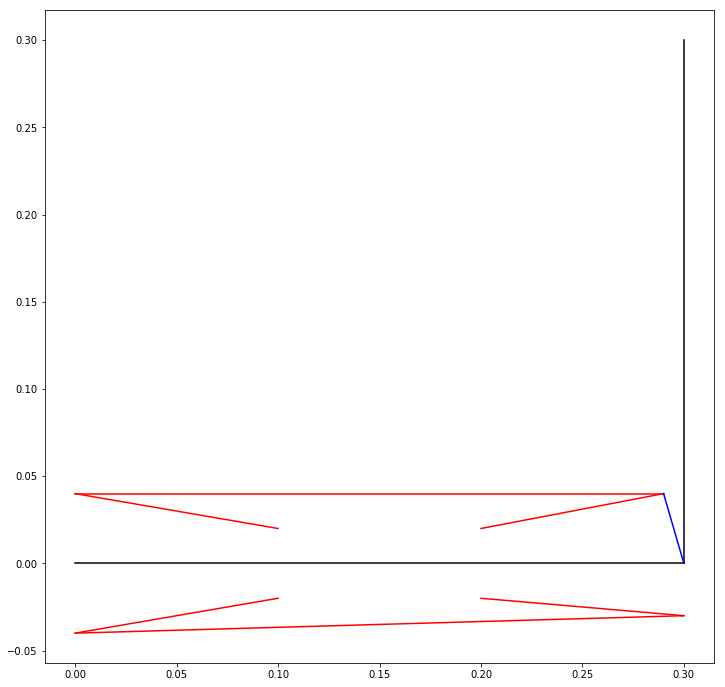

In [10]:
# plot the arm
fig = plt.figure(figsize = (12,12))
# upper arm and forearm
plt.plot([c_shoulder[0], c_elbow[0]], [c_shoulder[1],c_elbow[1]], 'k')
plt.plot([c_elbow[0], c_hand[0]], [c_elbow[1], c_hand[0]], 'k')
# insertion points
points = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12]
x_coords = [i[0] for i in points]
y_coords = [i[1] for i in points]
for idx in range(0,12,2):
    plt.plot(x_coords[idx:idx+2], y_coords[idx:idx+2], 'r')
plt.show()

In [6]:
x = x_coords
y = y_coords
lengths = []
for idx in list(range(11))[0::2]:
    lengths.append( np.linalg.norm([x[idx]-x[idx+1], y[idx]-y[idx+1]]) )
lengths

[0.29,
 0.10198039027185571,
 0.10198039027185571,
 0.30016662039607267,
 0.09219544457292884,
 0.10049875621120888]

## Torque produced by each muscle given its tension
For each muscle, given a Tension $T$, produce the torque $\tau$ it produces with respect to either the shoulder or the elbow axis.

In [ ]:
T = 1.

def shoulder_torque(i_prox, i_dist, T):
    """ Obtain the torque produced by a muscle wrt the shoulder joint.
    
        Args:
            i_prox : coordinates of proximal insertion point (tuple)
            i_dist : coordinates of distal insertion point (tuple)
            T : muscle tension
        Returns:
            float
    """
    v = np.array([i_prox[0] - i_dist[0], i_prox[1] - i_dist[1]])
    v_norm = (sum(v*v))**(1./2.)
    F = (T/v_norm) * v
    tau = i_dist[0] * F[1] - i_dist[1] * F[0]
    return tau

def elbow_torque(i_prox, i_dist, T):
    """ Obtain the torque produced by a muscle wrt the shoulder joint.
    
        Args:
            i_prox : coordinates of proximal insertion point (tuple)
            i_dist : coordinates of distal insertion point (tuple)
            T : muscle tension
        Returns:
            float
    """
    v = np.array([i_prox[0] - i_dist[0], i_prox[1] - i_dist[1]])
    v_norm = (sum(v*v))**(1./2.)
    F = (T/v_norm) * v
    tau = (i_dist[0]-c_elbow[0]) * F[1] - (i_dist[1]-c_elbow[1]) * F[0]
    return tau

#ip = [np.array(p) for p in points]
# muscle 1 wrt shouler
tau1s = shoulder_torque(i1, i2, T)
# muscle 1 wrt elbow
tau1e = elbow_torque(i1, i2, T)
# muscle 2 wrt shoulder
tau2s = shoulder_torque(i3, i4, T)
# muscle 3 wrt shoulder
tau3s = shoulder_torque(i5, i6, T)
# muscle 4 wrt shouler
tau4s = shoulder_torque(i7, i8, T)
# muscle 4 wrt elbow
tau4e = elbow_torque(i7, i8, T)
# muscle 5 wrt elbow
tau5e = elbow_torque(i9, i10, T)
# muscle 6 wrt elbow
tau6e = elbow_torque(i11, i12, T)

tau_shoulder = tau1s + tau2s + tau3s + tau4s
tau_elbow = tau1e + tau4e + tau5e + tau6e

In [ ]:
from draculab import *
from plants.plants import spring_muscle
params = {'l0': 0.9,
          's' : 0.05,
          'g1': 1.,
          'g2': 0.5,
          'g3': 0.5,
          'dt': 0.01,
          'p1': [0.,0.],
          'p2': [.2,0.] }
musk = spring_muscle(params)

In [ ]:
for pos in [.2+0.03*i for i in range(15)]:
    musk.update((0.,0.),(pos,0), 1., 1., 1.)

In [ ]:
musk.T

In [ ]:
print(musk.l_lpf_fast)
print(musk.l_lpf_mid)

In [6]:
np.maximum(np.array([1,2,3,4]), 2)

array([2, 2, 3, 4])

In [20]:
ad = {'a':1, 'b':2}
bd = {'c':3, 'd':4}
cd = {'e':5, 'f':6}
for a,b,c in zip(ad,bd,cd):
    print(a+b+c)
for keya, keyb in zip(ad.keys(), bd.keys()):
    print("ad=%d, bd=%d" % (ad[keya], bd[keyb]))

bcf
ade
ad=2, bd=3
ad=1, bd=4


## Testing an instance of the `planar_arm_v3` class

In [1]:
%cd ..
from draculab import *
#import draculab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
%matplotlib widget

/home/z/projects/draculab


In [2]:
net_params = {'min_delay':0.01,
              'min_buff_size': 10 }

arm_params = {'type': plant_models.planar_arm_v3,
          'mass1': 1.,
          'mass2': 1.,
          'init_q1': 0.,
          'init_q2': 0., #np.pi/2.,
          'init_q1p': 0.,
          'init_q2p': 0.,
          'g': 0.0,
          'mu1': 0.01,
          'mu2': 0.01,
          'l_torque' : 0.001,
          'l_visco' : 0.001,
          'g1_e' : 20.,
          'l0_e' : [1.]*6,
          'Ia_gain' : 3.*np.array([3.,10.,10., 3.,10.,10.]),
          'II_gain' : 1., #[1., 3., 3., 3., 3., 3.],
          'Ib_gain' : 5.,
          'T_0' : .5,
          'k_pe_e' : 2.,
          'k_se_e' : 5.,
          'b_e' : 5.,
          'k_pe_s' : 4.,
          'k_se_s' : 8., #14,
          'k_pe_d' : 3.,
          'k_se_d' : 8., #14
          'b_s' : 4.,
          'b_d' : 4.,
          'l0_s': .5,
          'l0_d': .5,
          'fs' : 0.2,
          'gs_gain' : 0.,
          'gd_gain' : 0.,
          'se_II' : 0.2
             }
linear_params = {'type' : unit_types.linear,
                 'tau' : 0.01,
                 'init_val' : 0.5 }
track_params = {'type': unit_types.source,
                'init_val': 0.,
                'function' : lambda x: 0.}
inp_params = {'type': unit_types.source,
              'init_val': 0., #1.,
              'function' : lambda x: max(np.sign(x - 30.), 0.) } #1.
net = network(net_params)
arm_id = net.create(1, arm_params)
# create source units to track the insertion points
ipx_track = net.create(12, track_params) # x coordinates
ipy_track = net.create(12, track_params) # y coordinates
# create input unit
inp = net.create(1, inp_params)
# connect input to intrafusals
conn_spec_Ia = {'inp_ports' : 9, # Ia input to muscle 4
             'delays' : net_params['min_delay'] }
conn_spec_II = {'inp_ports' : 13, # II input to muscle 2
             'delays' : net_params['min_delay'] }
syn_spec = {'type' : synapse_types.static,
            'init_w' : .1 }
net.set_plant_inputs(inp, arm_id, conn_spec_Ia, syn_spec )
net.set_plant_inputs(inp, arm_id, conn_spec_II, syn_spec )

# (REDUNDANT TEST) create linear units to track the outputs of the arm
#arm_outs = net.create(28, linear_params) # the arm has 28 output ports

# make the source units track the insertion points
def create_xtracker(arm_id, idx):
    return lambda t: net.plants[arm_id].ip[idx][0]

def create_ytracker(arm_id, idx):
    return lambda t: net.plants[arm_id].ip[idx][1]

for idx, uid in enumerate(ipx_track):
    net.units[uid].set_function(create_xtracker(arm_id, idx))
for idx, uid in enumerate(ipy_track):
    net.units[uid].set_function(create_ytracker(arm_id, idx))
    
# connect the plant's outputs to the linear units
"""
arm_outs_conn = {'port_map' : [[(i,0)] for i in range(28)],
                 'delays' : 0.01 }
arm_outs_syn = {'type' : synapse_types.static,
                'init_w' : 1. }
net.set_plant_outputs(arm_id, arm_outs, arm_outs_conn, arm_outs_syn)
"""

"\narm_outs_conn = {'port_map' : [[(i,0)] for i in range(28)],\n                 'delays' : 0.01 }\narm_outs_syn = {'type' : synapse_types.static,\n                'init_w' : 1. }\nnet.set_plant_outputs(arm_id, arm_outs, arm_outs_conn, arm_outs_syn)\n"

In [3]:
sim_time = 30. # simulation time
start_time = time.time()
sim_dat = net.run(sim_time)
arm_activs = np.array(sim_dat[2][arm_id])
activs = np.array(sim_dat[1])
print('Execution time: %s seconds' % (time.time() - start_time))

Execution time: 5.569936752319336 seconds


In [32]:
net.units[inp[0]].get_act(35.0001)

1.0

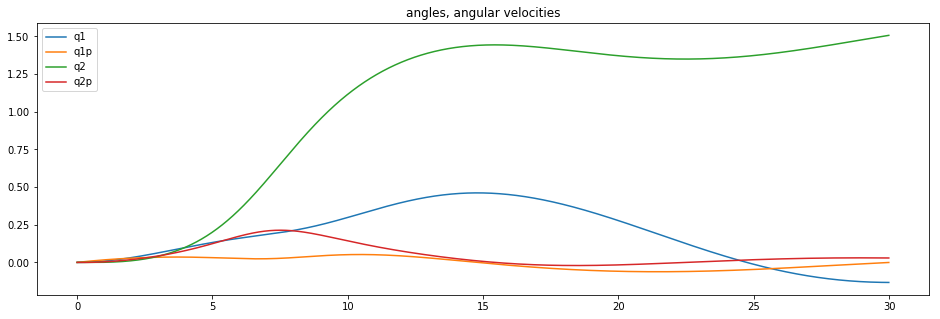

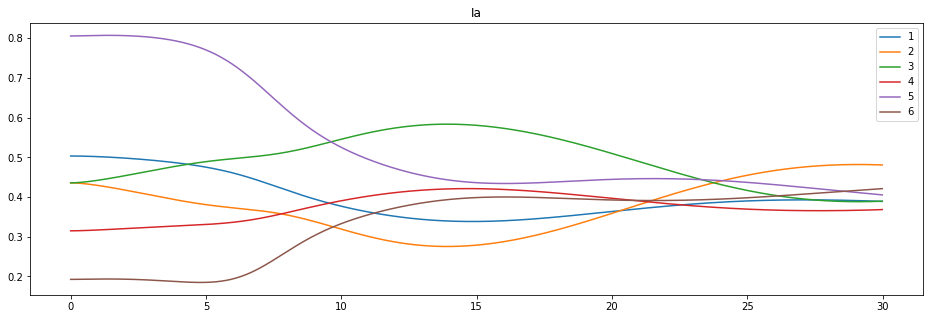

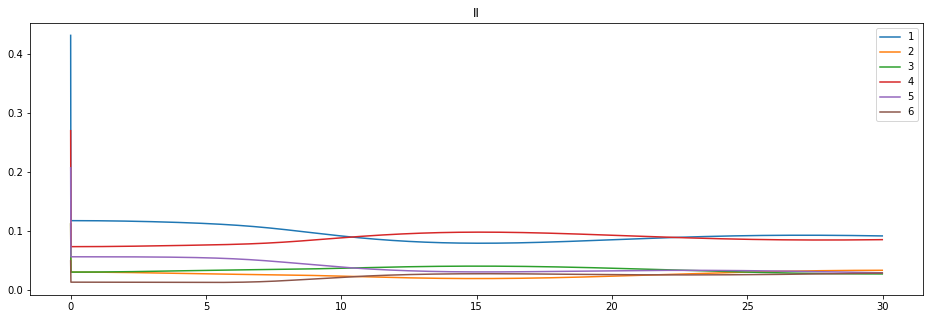

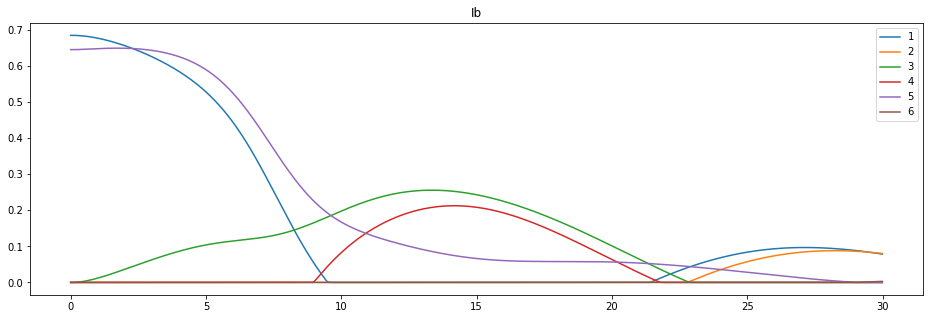

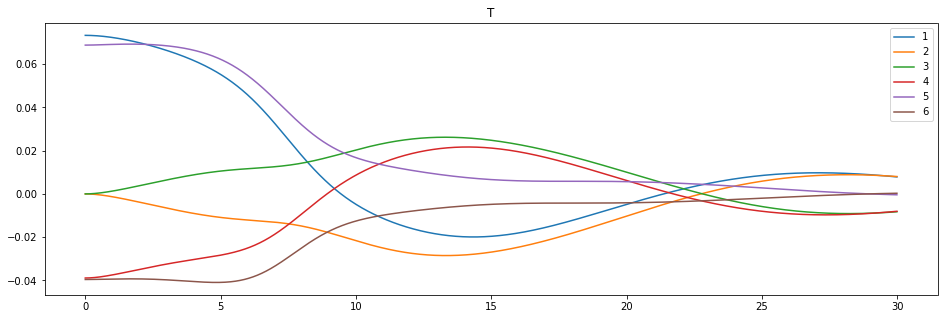

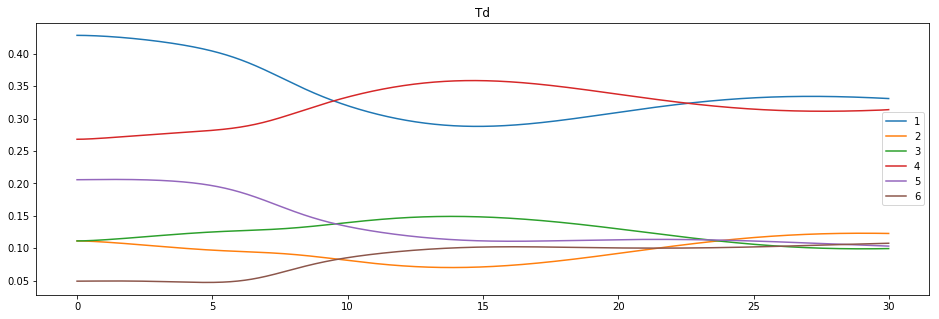

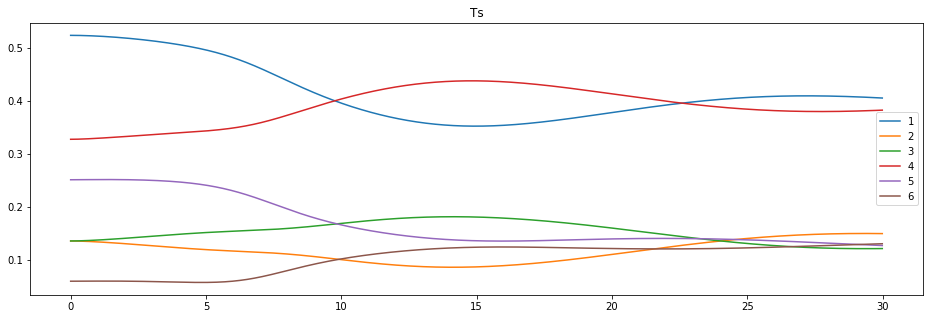

In [4]:
# plotting muscle outputs
fs = (16,5)

# plotting all the state variables
st_fig = plt.figure(figsize=fs)
plt.plot(sim_dat[0], arm_activs[:,0:4])
plt.legend(['q1', 'q1p', 'q2', 'q2p'])
plt.title('angles, angular velocities')

legs = [str(i+1) for i in range(6)]
Ia_fig = plt.figure(figsize=fs)
Ia_affs = arm_activs[:,28:34]
plt.plot(sim_dat[0], Ia_affs)
plt.legend(legs)
plt.title('Ia')

II_fig = plt.figure(figsize=fs)
II_affs = arm_activs[:,34:40]
plt.plot(sim_dat[0], II_affs)
plt.legend(legs)
plt.title('II')

Ib_fig = plt.figure(figsize=fs)
Ib_affs = arm_activs[:,22:28]
plt.plot(sim_dat[0], Ib_affs)
plt.legend(legs)
plt.title('Ib')

T_fig = plt.figure(figsize=fs)
T_affs = arm_activs[:,4:10]
plt.plot(sim_dat[0], T_affs)
plt.legend(legs)
plt.title('T')

Td_fig = plt.figure(figsize=fs)
Td_affs = arm_activs[:,10:16]
plt.plot(sim_dat[0], Td_affs)
plt.legend(legs)
plt.title('Td')

Ts_fig = plt.figure(figsize=fs)
Ts_affs = arm_activs[:,16:22]
plt.plot(sim_dat[0], Ts_affs)
plt.legend(legs)
plt.title('Ts')

plt.show()

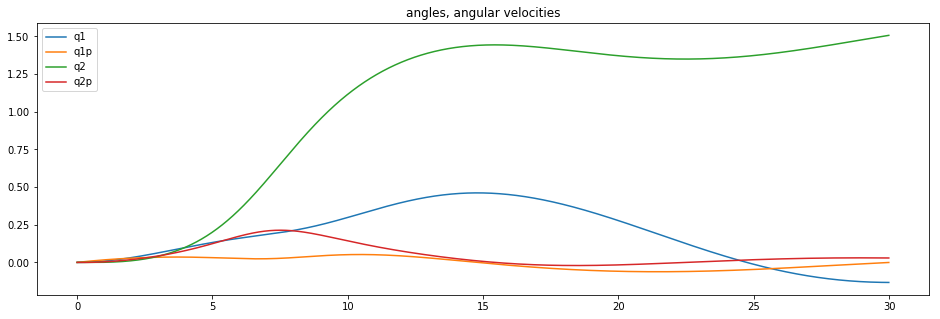

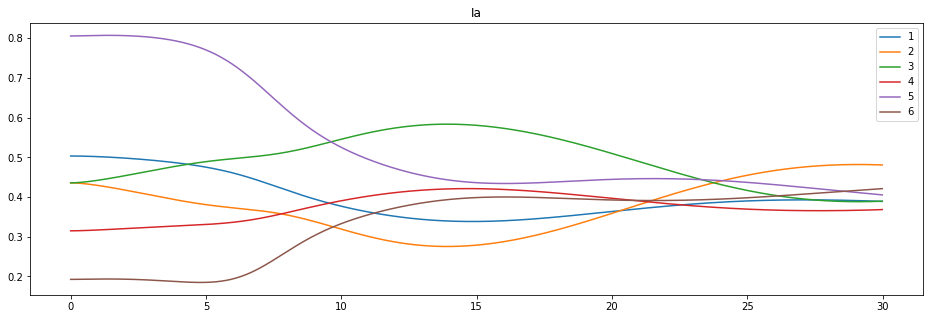

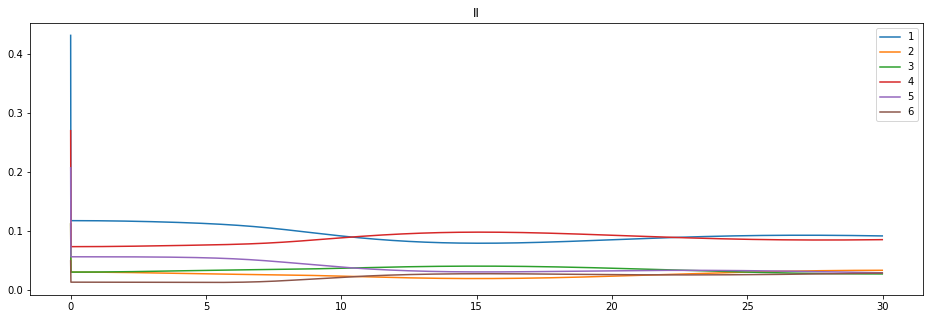

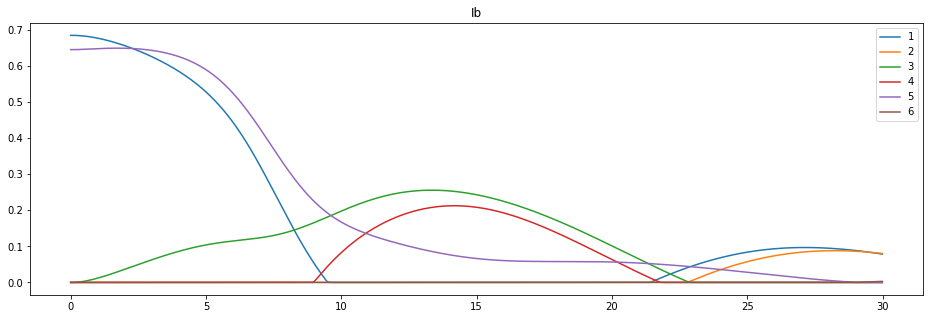

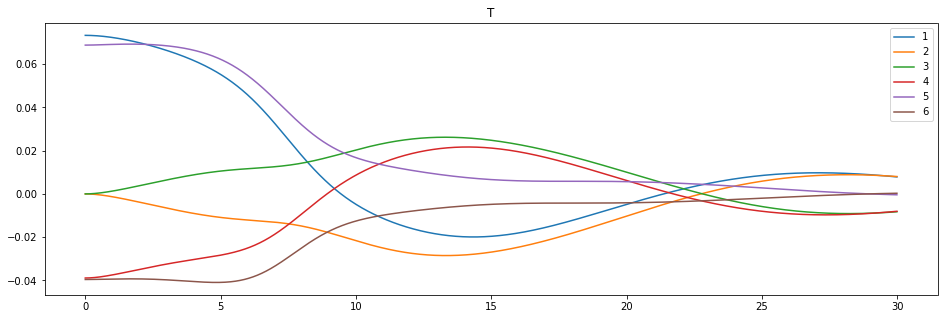

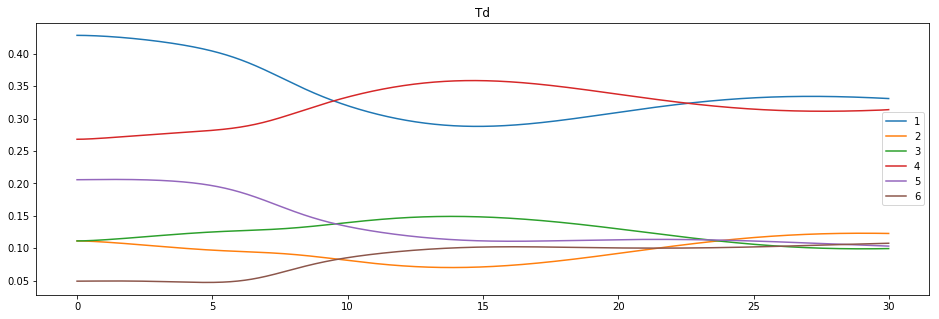

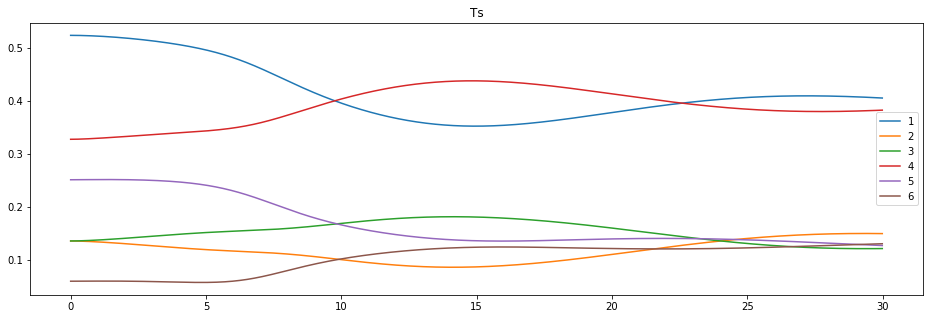

In [4]:
# plotting muscle outputs
fs = (16,5)

# plotting all the state variables
st_fig = plt.figure(figsize=fs)
plt.plot(sim_dat[0], arm_activs[:,0:4])
plt.legend(['q1', 'q1p', 'q2', 'q2p'])
plt.title('angles, angular velocities')

legs = [str(i+1) for i in range(6)]
Ia_fig = plt.figure(figsize=fs)
Ia_affs = arm_activs[:,28:34]
plt.plot(sim_dat[0], Ia_affs)
plt.legend(legs)
plt.title('Ia')

II_fig = plt.figure(figsize=fs)
II_affs = arm_activs[:,34:40]
plt.plot(sim_dat[0], II_affs)
plt.legend(legs)
plt.title('II')

Ib_fig = plt.figure(figsize=fs)
Ib_affs = arm_activs[:,22:28]
plt.plot(sim_dat[0], Ib_affs)
plt.legend(legs)
plt.title('Ib')

T_fig = plt.figure(figsize=fs)
T_affs = arm_activs[:,4:10]
plt.plot(sim_dat[0], T_affs)
plt.legend(legs)
plt.title('T')

Td_fig = plt.figure(figsize=fs)
Td_affs = arm_activs[:,10:16]
plt.plot(sim_dat[0], Td_affs)
plt.legend(legs)
plt.title('Td')

Ts_fig = plt.figure(figsize=fs)
Ts_affs = arm_activs[:,16:22]
plt.plot(sim_dat[0], Ts_affs)
plt.legend(legs)
plt.title('Ts')

plt.show()

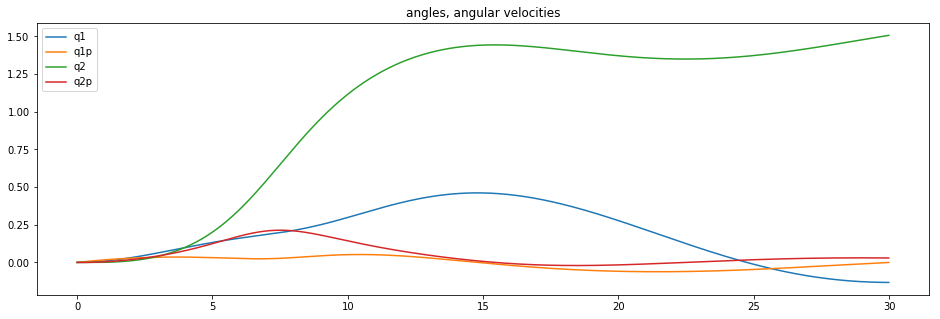

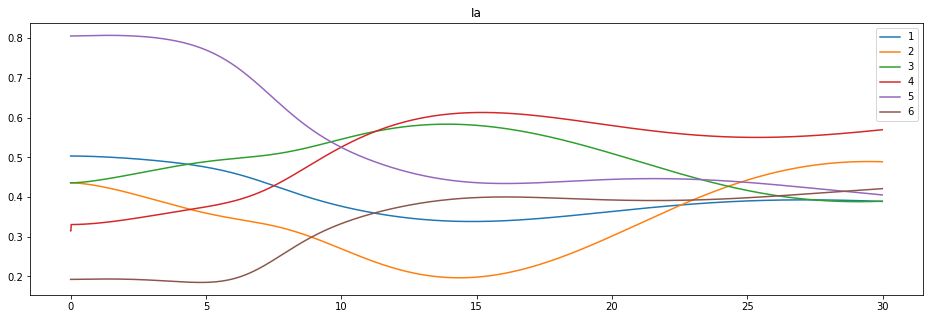

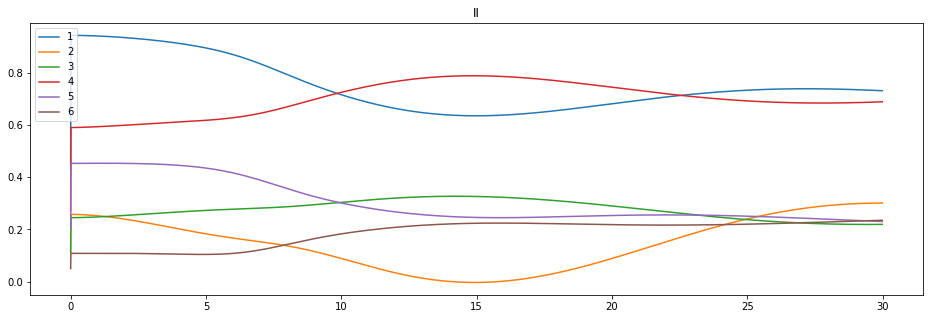

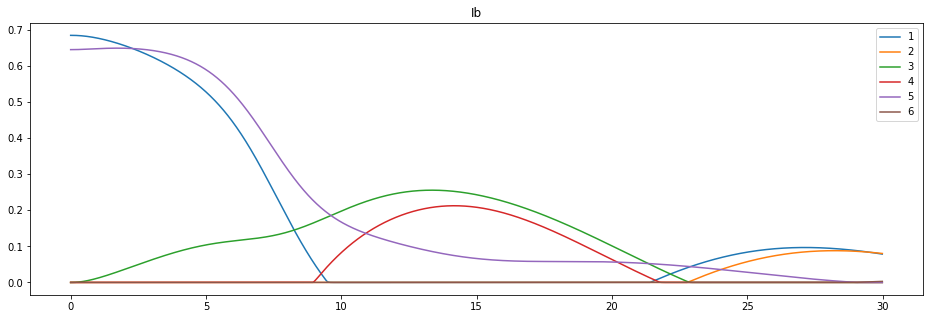

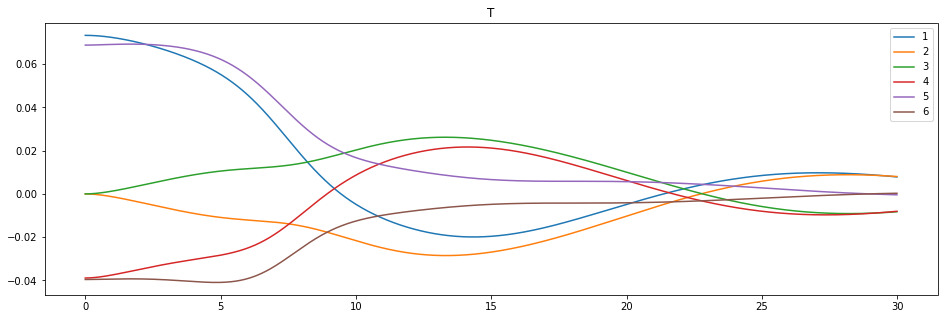

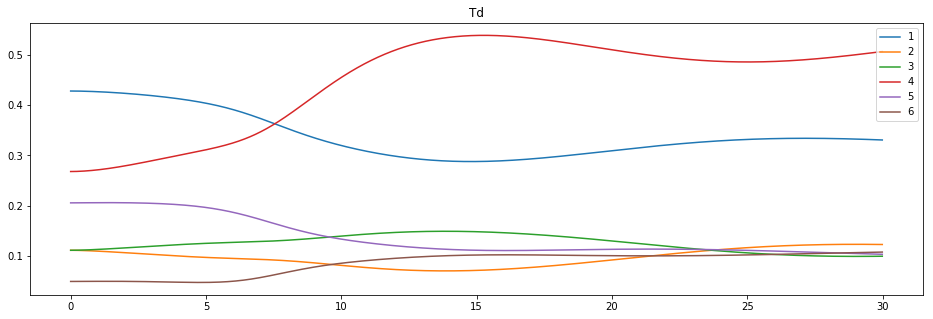

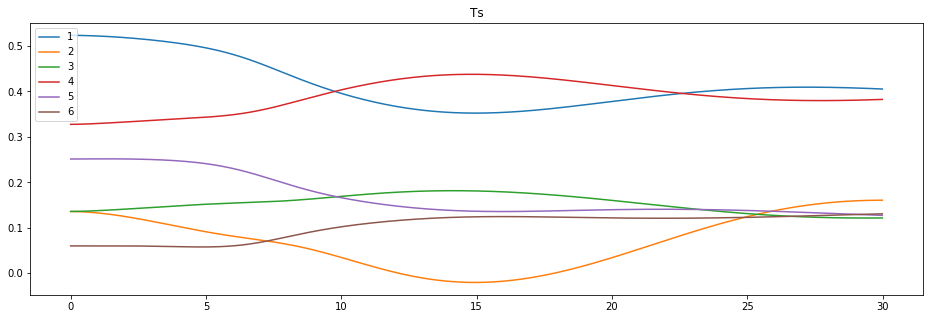

In [21]:
# plotting muscle outputs
fs = (16,5)

# plotting all the state variables
st_fig = plt.figure(figsize=fs)
plt.plot(sim_dat[0], arm_activs[:,0:4])
plt.legend(['q1', 'q1p', 'q2', 'q2p'])
plt.title('angles, angular velocities')

legs = [str(i+1) for i in range(6)]
Ia_fig = plt.figure(figsize=fs)
Ia_affs = arm_activs[:,28:34]
plt.plot(sim_dat[0], Ia_affs)
plt.legend(legs)
plt.title('Ia')

II_fig = plt.figure(figsize=fs)
II_affs = arm_activs[:,34:40]
plt.plot(sim_dat[0], II_affs)
plt.legend(legs)
plt.title('II')

Ib_fig = plt.figure(figsize=fs)
Ib_affs = arm_activs[:,22:28]
plt.plot(sim_dat[0], Ib_affs)
plt.legend(legs)
plt.title('Ib')

T_fig = plt.figure(figsize=fs)
T_affs = arm_activs[:,4:10]
plt.plot(sim_dat[0], T_affs)
plt.legend(legs)
plt.title('T')

Td_fig = plt.figure(figsize=fs)
Td_affs = arm_activs[:,10:16]
plt.plot(sim_dat[0], Td_affs)
plt.legend(legs)
plt.title('Td')

Ts_fig = plt.figure(figsize=fs)
Ts_affs = arm_activs[:,16:22]
plt.plot(sim_dat[0], Ts_affs)
plt.legend(legs)
plt.title('Ts')

plt.show()

In [7]:
#Animation of the arm and muscles
%matplotlib widget
from numpy import cos, sin

# angles of shoulder and elbow
theta_s = arm_activs[:,0]
theta_e = arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sim_dat[1])
ipx = acts[ipx_track]
ipy = acts[ipy_track]
ten = arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = net.plants[arm_id].l_arm
l2 = net.plants[arm_id].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2
# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-b', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))
    
    cur_time = frame*0.01
    fig.suptitle('time: ' + '{:f}'.format(cur_time))
    return line, points, muls_lines #muscle1

ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 10), init_func=init, blit=True, interval=10)

plt.show()

FigureCanvasNbAgg()

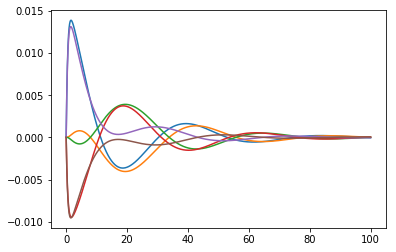

In [7]:
# plotting the tensions
ten = arm_activs[:,4:10]
fig = plt.figure()
plt.plot(sim_dat[0], ten)
plt.show()

# plot the tensions using the stored plant state variables
#tensions = arm_activs[:, np.array(range(7, 28, 4))]
#fig = plt.figure()
#plt.plot(sim_dat[0], tensions)
#plt.show()